In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pandas as pd

users_df = pd.read_csv("users_clean.csv", parse_dates=["signup_date"])
view_history_df = pd.read_csv("view_history_clean.csv", parse_dates=["watch_date"])



In [11]:
# Aggregate viewing behavior by user
user_features = (
    view_history_df
    .groupby("user_id")
    .agg(
        total_views=("content_id", "count"),
        total_watch_time=("watch_duration_min", "sum"),
        avg_watch_per_session=("watch_duration_min", "mean"),
        unique_titles_watched=("content_id", "nunique")
    )
    .reset_index()
)


In [12]:
from sklearn.preprocessing import StandardScaler

X = user_features.drop("user_id", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
user_features["cluster"] = kmeans.fit_predict(X_scaled)


C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


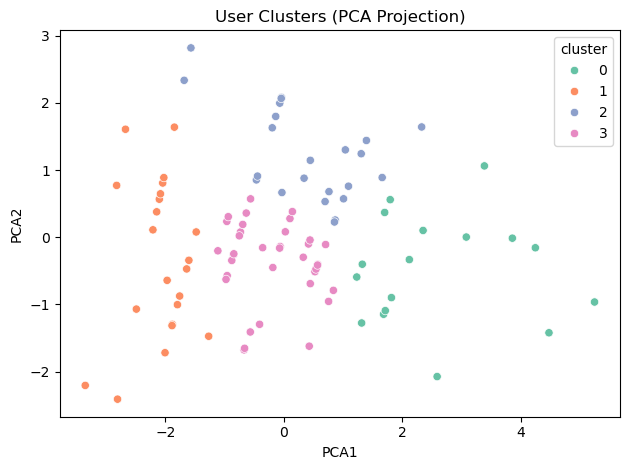

In [14]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

user_features["PCA1"] = X_pca[:, 0]
user_features["PCA2"] = X_pca[:, 1]

sns.scatterplot(
    data=user_features,
    x="PCA1", y="PCA2",
    hue="cluster", palette="Set2"
)
plt.title("User Clusters (PCA Projection)")
plt.tight_layout()
plt.show()


In [15]:
users_clustered = users_df.merge(user_features[["user_id", "cluster"]], on="user_id", how="left")


In [16]:
# Summarize user patterns by cluster
cluster_summary = (
    user_features
    .groupby("cluster")
    .agg(
        users_in_cluster=("user_id", "count"),
        avg_total_views=("total_views", "mean"),
        avg_total_watch_time=("total_watch_time", "mean"),
        avg_watch_per_session=("avg_watch_per_session", "mean"),
        avg_unique_titles=("unique_titles_watched", "mean")
    )
    .reset_index()
)
print(cluster_summary)


   cluster  users_in_cluster  avg_total_views  avg_total_watch_time  \
0        0                17         8.823529            550.058824   
1        1                22         2.363636            125.409091   
2        2                23         5.000000            425.434783   
3        3                36         5.083333            296.694444   

   avg_watch_per_session  avg_unique_titles  
0              62.658414           8.588235  
1              55.462121           2.318182  
2              87.110870           4.782609  
3              59.009061           4.750000  


In [17]:
import pandas as pd

# Define cluster personas and recommendations
cluster_insights = pd.DataFrame({
    "cluster": [0, 1, 2, 3],
    "users_in_cluster": [17, 22, 23, 36],
    "avg_total_views": [8.82, 2.36, 5.0, 5.08],
    "avg_total_watch_time": [550.06, 125.41, 425.43, 296.69],
    "avg_watch_per_session": [62.66, 55.46, 87.11, 59.01],
    "avg_unique_titles": [8.59, 2.32, 4.78, 4.75],
    "persona": [
        "🎯 Devoted Explorers",
        "💤 Low Engagement",
        "🍿 Binge Stylists",
        "📺 Moderate Steady Streamers"
    ],
    "recommendation": [
        "Recommend genre-spanning, deep series or new releases based on completed titles.",
        "Engage with starter packs, personalized emails, or one-click resumption nudges.",
        "Push binge-ready series, weekend bundles, or reward-based viewing streaks.",
        "Encourage watching with fresh content or continuation incentives; upsell gently."
    ]
})

# Display table in notebook
cluster_insights.style.set_caption("📊 Cluster Interpretation & Strategic Recommendations")


,cluster,users_in_cluster,avg_total_views,avg_total_watch_time,avg_watch_per_session,avg_unique_titles,persona,recommendation
0,0,17,8.820000,550.060000,62.660000,8.590000,🎯 Devoted Explorers,"Recommend genre-spanning, deep series or new releases based on completed titles."
1,1,22,2.360000,125.410000,55.460000,2.320000,💤 Low Engagement,"Engage with starter packs, personalized emails, or one-click resumption nudges."
2,2,23,5.000000,425.430000,87.110000,4.780000,🍿 Binge Stylists,"Push binge-ready series, weekend bundles, or reward-based viewing streaks."
3,3,36,5.080000,296.690000,59.010000,4.750000,📺 Moderate Steady Streamers,Encourage watching with fresh content or continuation incentives; upsell gently.


In [18]:
# Merge cluster labels with user metadata
users_clustered = users_df.merge(user_features[["user_id", "cluster"]], on="user_id", how="left")

# Export to CSV for Tableau
users_clustered.to_csv("users_with_clusters.csv", index=False)


In [21]:
users_clustered.to_csv("users_with_clusters.csv", index=False)


In [22]:
user_features = (
    view_history_df
    .groupby("user_id")
    .agg(
        total_views=("content_id", "count"),
        total_watch_time=("watch_duration_min", "sum"),
        avg_watch_per_session=("watch_duration_min", "mean"),
        unique_titles_watched=("content_id", "nunique")
    )
    .reset_index()
)


In [23]:
users_enriched = users_df.merge(user_features, on="user_id", how="left")


In [24]:
users_enriched.to_csv("users_enriched.csv", index=False)


In [25]:
user_features["cluster"] = kmeans.fit_predict(X_scaled)


C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [27]:
# Combine user metadata with behavior metrics + cluster labels
users_enriched = users_df.merge(user_features, on="user_id", how="left")


In [28]:
users_enriched.to_csv("users_enriched.csv", index=False)


In [29]:
import numpy as np

users_enriched["churn_risk"] = np.where(
    (users_enriched["total_watch_time"] < 150) & (users_enriched["avg_watch_per_session"] < 40),
    "High Risk",
    "Low/Medium Risk"
)


In [31]:
users_enriched.to_csv("users_enriched_with_churn.csv", index=False)
